(-0.5, 511.5, 511.5, -0.5)

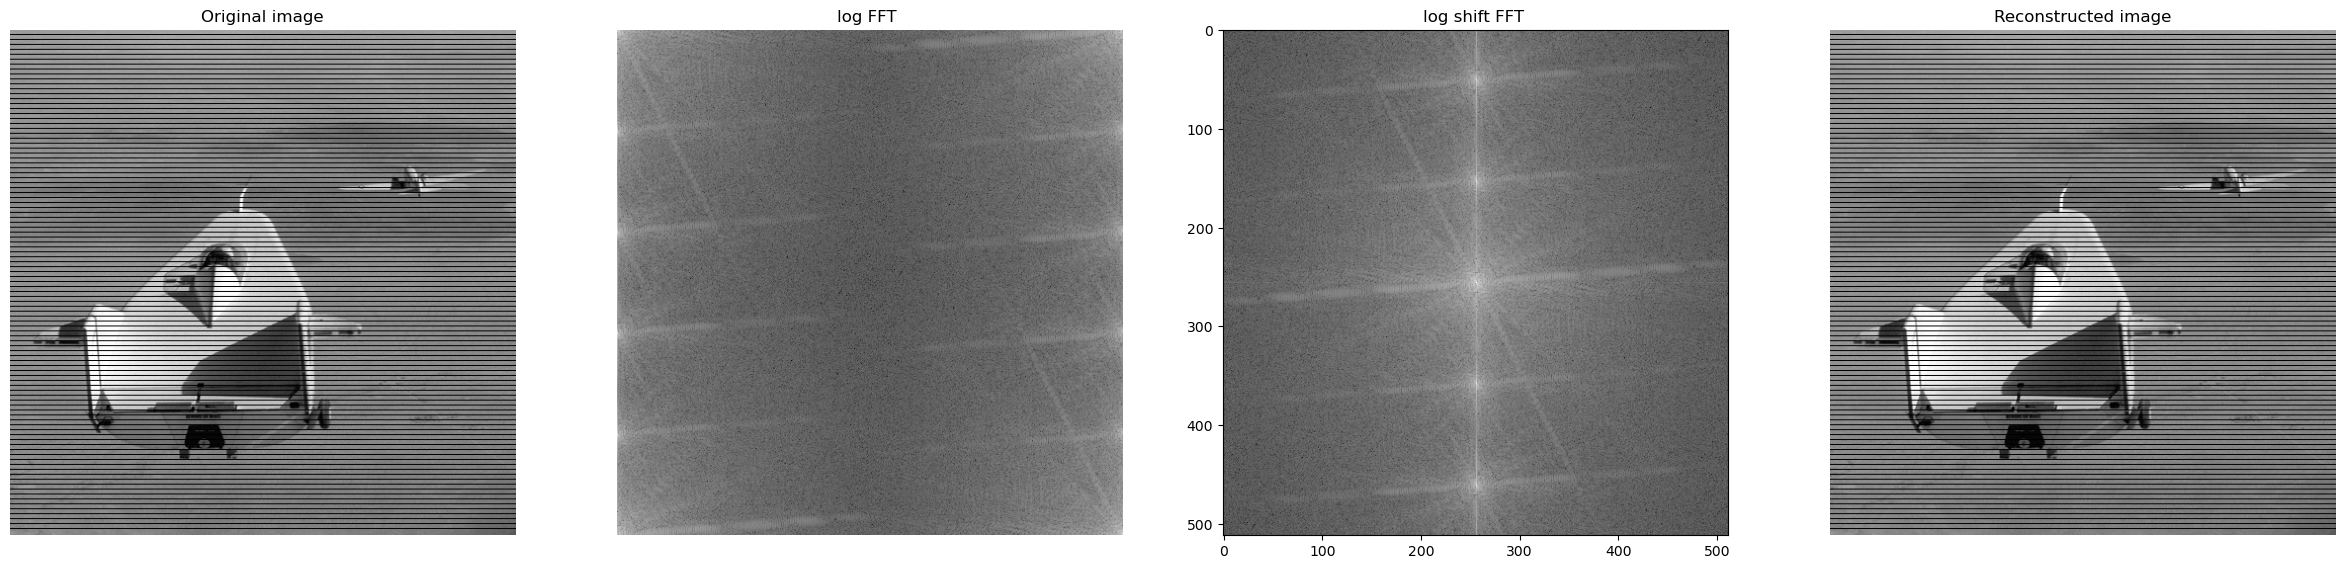

In [51]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io as io
from skimage.transform import resize
import cmath
import math
import cv2
from skimage.morphology import square, disk

IMDIR = "./plane.png/"

im = io.imread(IMDIR,as_gray=True)
#im = resize(im,(100,100),mode='constant') # RESIZE IF TOO SLOW 
imfft=np.fft.fft2(im)
imfftangle=np.angle(imfft)
imfftabs=np.abs(imfft)
imfftlog=np.log(imfftabs)
imfftlogshift=np.fft.fftshift(imfftlog)
imIfftlog=np.fft.ifftshift(imfftlogshift)
imIfftabs=np.exp(imIfftlog)
imIfft=imIfftabs*np.exp(1j*imfftangle)
iminverse=np.real((np.fft.ifft2((imIfft))))
iminverse=iminverse/np.max(iminverse)

plt.figure(1,figsize=(30,30))

plt.subplot(141)
plt.title('Original image')
plt.imshow(im)
plt.gray()
plt.axis('off')

            
plt.subplot(142)
plt.title('log FFT ')
plt.imshow(imfftlog)
plt.gray()
plt.axis('off')
                        
plt.subplot(143)
plt.title('log shift FFT ')
plt.imshow(imfftlogshift)
plt.gray()


            
plt.subplot(144)
plt.title('Reconstructed image')
plt.imshow(iminverse)
plt.gray()
plt.axis('off')


In [2]:
def notchfilter(filtype,shape,points,cutoff):
    if filtype=='ideal':
        m = shape[0]
        n = shape[1]
        TF = np.ones(shape,dtype=np.bool)
        center = np.array(TF.shape)/2.0
        for iy in range(m):
            for ix in range(n):
                for d in range(points.shape[0]):
                    u0 = points[d,0]
                    v0 = points[d,1]
                    u0,v0=v0,u0
                    d1 = math.sqrt((iy -center[0]- u0)**2 + (ix -center[1]- v0)**2)
                    d2 = math.sqrt((iy-center[0] + u0)**2 + (ix -center[1]+ v0)**2)
                    if d1 <= cutoff or d2 <= cutoff:
                        TF[iy,ix] *= 0.0
    elif filtype=='gaussian':
        m = shape[0]
        n = shape[1]
        TF = np.ones(shape)
        center = np.array(TF.shape)/2.0
        for iy in range(m):
            for ix in range(n):
                for d in range(points.shape[0]):
                    u0 = points[d,0]
                    v0 = points[d,1]
                    u0,v0=v0,u0
                    d1 = math.sqrt((iy -center[0]- u0)**2 + (ix -center[1]- v0)**2)
                    d2 = math.sqrt((iy -center[0]+ u0)**2 + (ix -center[1]+ v0)**2)
                    TF[iy,ix]*= (1-math.exp(-d1**2/(2*cutoff**2)))* (1-math.exp(-d2**2/(2*cutoff**2)))
    return TF


In [ ]:
def notchfilter(shape,points,cutoff):
    m = shape[0]
    n = shape[1]
    TF = np.ones(shape)
    center = np.array(TF.shape)/2.0
    for iy in range(m):
        for ix in range(n):
            for d in range(points.shape[0]):
                u0 = points[d,0]
                v0 = points[d,1]
                u0,v0=v0,u0
                d1 = math.sqrt((iy -center[0]- u0)**2 + (ix -center[1]- v0)**2)
                d2 = math.sqrt((iy -center[0]+ u0)**2 + (ix -center[1]+ v0)**2)
                TF[iy,ix]*= (1-math.exp(-d1**2/(2*cutoff**2)))* (1-math.exp(-d2**2/(2*cutoff**2)))
    return TF


(-0.5, 511.5, 511.5, -0.5)

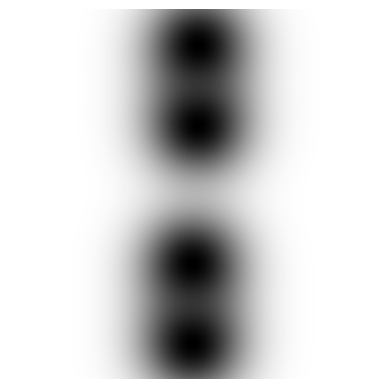

In [28]:
shape=im.shape;
cutoff=50;
points=np.array([[260,50],[260,160]])
center = np.array(shape)/2.0
points[0,:]=points[0,:]-center[0]
points[1,:]=points[1,:]-center[1]
plt.figure(1)
plt.imshow(notchfilter('gaussian',shape,points,cutoff))
plt.axis('off')


In [15]:
shape=im.shape;

#Détermination du diamètre de coupure
cutoff=50;

#Détermination des points à rejeter

points=np.array([[260,50],[260,160]])
center = np.array(shape)/2.0
points[0,:]=points[0,:]-center[0]
points[1,:]=points[1,:]-center[1]

#Création du filtre
TF=notchfilter(shape,points,cutoff)

#Application du filtre 
imfft=np.fft.fft2(im);
imfft=np.fft.fftshift(imfft);
imfil=imfft*TF
imfil=np.fft.ifftshift(imfil)
res=np.real(np.fft.ifft2(imfil))

(2,)

In [25]:
TF=notchfilter('gaussian',shape,points,cutoff)
imfft=np.fft.fft2(im);
imfft=np.fft.fftshift(imfft);
imfil=imfft*TF
imfil=np.fft.ifftshift(imfil)
res=np.real(np.fft.ifft2(imfil))
#res1=res[im.shape[0]//2:3*im.shape[0]//2,im.shape[1]//2:3*im.shape[1]//2]

(-0.5, 511.5, 511.5, -0.5)

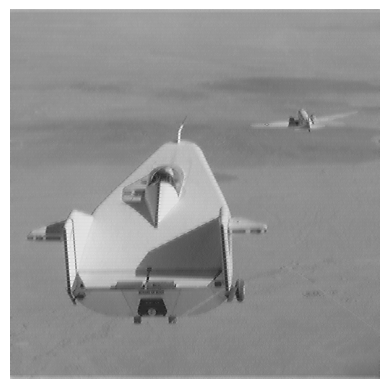

In [29]:
plt.figure(3)
plt.imshow(res,cmap='gray')
plt.axis('off')

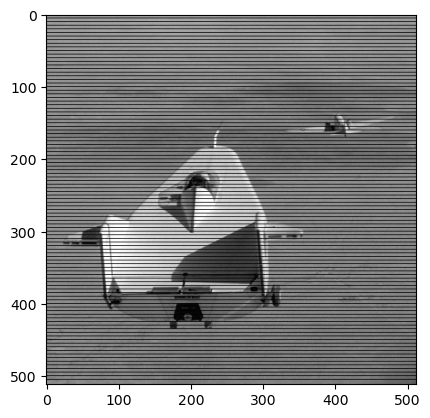

In [6]:
plt.imshow(im,cmap='gray')

Question 2 

In [3]:
IMDIR = "./card.png"

im = cv2.imread(IMDIR)

res=cv2.medianBlur(im,5)

cv2.imshow('result',res)

cv2.imwrite('./card_res.png',res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
IMDIR = "C:/Users/Besbes/Desktop/MiniProjet_IIA4/card.png"

im = cv2.imread(IMDIR)

res=cv2.medianBlur(im,5)

cv2.imshow('result',res)

cv2.imwrite('C:/Users/Besbes/Desktop/MiniProjet_IIA4/card_res.png',res)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
IMDIR = "./card_res.png"

im = cv2.imread(IMDIR)


(-0.5, 869.5, 199.5, -0.5)

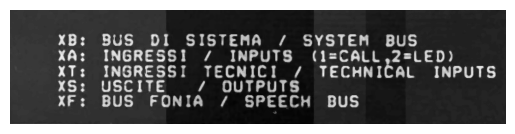

In [5]:

gray_card = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_card,cmap='gray')
plt.axis('off')


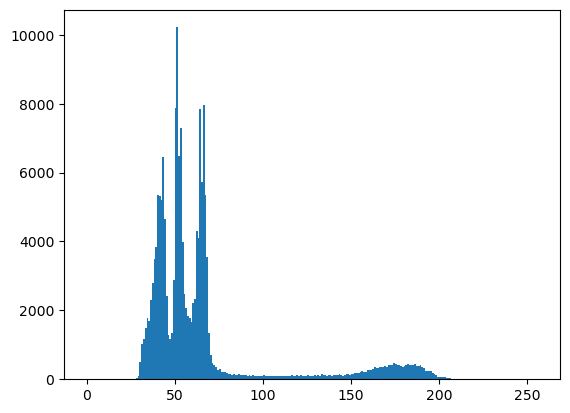

In [6]:
plt.hist(gray_card.ravel(),256,[0,256]); plt.show()

In [58]:
ret2,th2 = cv2.threshold(gray_card,100,255,cv2.THRESH_BINARY)

(-0.5, 869.5, 199.5, -0.5)

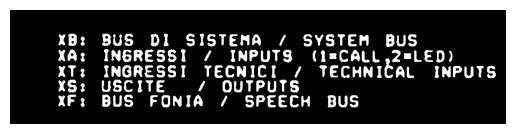

In [60]:
plt.imshow(th2)
plt.axis('off')

In [56]:

closing_card = cv2.morphologyEx(th2, cv2.MORPH_CLOSE, square(2))

(-0.5, 869.5, 199.5, -0.5)

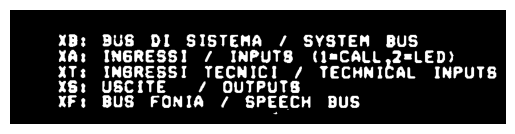

In [61]:
plt.imshow(closing_card)
plt.axis('off')

(-0.5, 869.5, 199.5, -0.5)

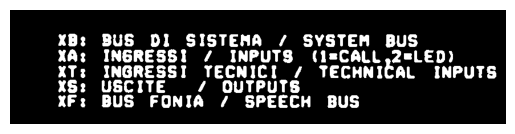

In [62]:
dilation_card = cv2.dilate(th2,square(2),iterations = 1)
plt.imshow(dilation_card)
plt.axis('off')

(-0.5, 869.5, 199.5, -0.5)

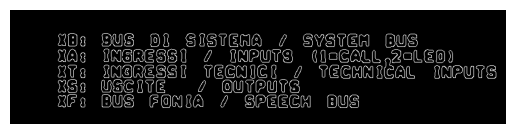

In [64]:
edges = cv2.Canny(dilation_card,0,1)
plt.imshow(edges,cmap='gray')
plt.axis('off')

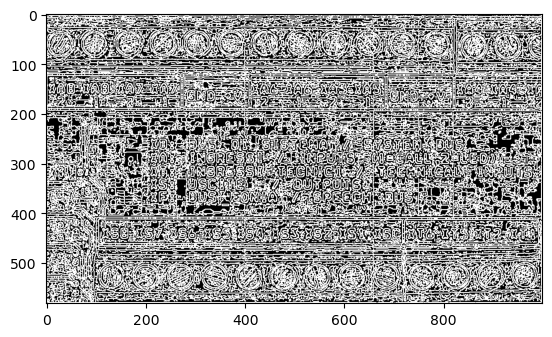

In [12]:
edges = cv2.Canny(res,0,1)

opening = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, square(2))
plt.imshow(opening,cmap='gray')

In [ ]:
image = cv2.imread("./flag.png")
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)


#On définit les limites des plages de couleur en code HSV

red_high=np.array([10,255,255])
red_low=np.array([0,50,50])


yellow_high=np.array([45, 255, 255])
yellow_low=np.array([22, 93, 0])


black_high=np.array([180, 255, 30])
black_low=np.array([0, 0, 0])






#Création des masques 

mask_red=cv2.inRange(hsv,red_low,red_high)
mask_yellow=cv2.inRange(hsv,yellow_low,yellow_high)
mask_black=cv2.inRange(hsv,black_low,black_high)

#Transformation des couleurs 

image[mask_red>0]=(34,139,34) #Le code couleur ici est en RGB ! 
image[mask_black>0]=(0, 230, 255)
image[mask_yellow>0]=(0,0,255)
cv2.imshow('test',image)
cv2.imwrite("result.png",image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
black=image[20,image.shape[1]//3,:]
red=image[20,(2*image.shape[1]//3)-10,:]
yellow=image[20,(2*image.shape[1]//3)+10,:]

print(red)


[0 0 0]


In [56]:
image[image==red]=[0,255,0]
image[image==black]=[255,255,0]
image[image==yellow]=[0,0,255]

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 274560 output values where the mask is true

In [63]:
print(image[1,2,:]==red)

[ True  True  True]
